# Analysis of ETE Discussion Posts 
My university Scholars program (ETE) is a 2-year program where we routinely discuss problems and solutions around climate change, as well as the social and environmental impacts that climate change has had on the world at large. A way to keep us thinking about issues is through weekly discussion posts, in which we're presented a new or recurring topic (like regenerative agriculture, nuclear energy, sustainable cities, biomimicry, and more) accompanied with a few articles containing stories, facts, or opinions around those topics, and are asked to give our thoughts. Someone in the class pointed out to me that they thought we all were gradually typing more each semester, which inspired me to analyze it a bit and see what else I could find.  

Some questions I want to answer are:
- Have we been writing more each semester?
- Have we been writing with more complexity?
- If so, by how much? And by which measures?

We've finished writing all of our discussion posts for our third semester, so I have 3 semesters-worth of data to work with. Our first semester class is called CPET100, the 2nd is CPET101, the third is CPET200 (data currently up to here), and the fourth is any of CPET2(3/4/5)0. Below I get started with some code to collect and clean the data, so if you're not interested, skip to [here](#Analysis-Part-1:-Word-Count) and read on.

## Data Collection

The [Canvas API](https://canvasapi.readthedocs.io/en/stable/getting-started.html) makes it super easy to access your canvas account and explore all types of things

In [1]:
# discovered this lifesaver after trying to brute force my way in with requests
from canvasapi import Canvas
from ete_secrets import canvas_key, ete_course_ids # auth key & course ids

# init a new Canvas object
canvas = Canvas('https://umd.instructure.com/', canvas_key)

The code below gets each discussion post's word count for each discussion, each semester. There's a good bit of garbage that comes in each post so I try to clean it with regex the best I can (I also downloaded each post and manually looked over them to verify they were just the text, so as to not skew the word counts + lexical measures later on).

In [2]:
import numpy as np
import re

# course ids are 7 digits, can be found in url after clicking on a course in Canvas
# call to get course info, need this to get discussion posts
ete_course_ids = [canvas.get_course(_id) for _id in ete_course_ids]
result = {}

file = open("alltext.txt", "w")

# download discussion posts for each course
for course in ete_course_ids:
    course_name = str(course).split(' ')[0]
#     print(course_name)
    result[course_name] = {}
    
    # one call to get discussion topics for 1 course
    discs = course.get_discussion_topics()

    for disc in discs:
        disc_name = re.match("Discussion Post \d{1,2}", str(disc)) 
        if disc_name:
            disc_name = disc_name[0]
#             print(disc_name)
        else:
            continue # skip rest of code
            
        # fetching actual data/all posts for 1 discussion topic
        posts = disc.get_topic_entries(per_page=99)
        post_tracker, word_counts = [], []
        
        # removing some of the garbage html tags + other specifics I explored earlier, one post at a time
        for post in posts:
            txt = str(post)[:-11]
            repl = ["&nbsp;"]
            matches = re.findall("(<[^>]*>)", txt) # detect html tag
            if matches:
                repl.extend(matches)
            for badstuff in repl: # remove html tags
                txt = txt.replace(badstuff, '')
            txt = txt.strip()
            post_tracker.append(txt)
            file.write(txt+'\n\n')
            word_counts.append(len(txt.split(' ')))
    
        result[course_name][disc_name] = [np.array(word_counts), np.array(post_tracker)]

for course, discs in result.items():
    print(f"{course} has {len(discs)} discussions")

CPET100 has 7 discussions
CPET101 has 11 discussions
CPET200 has 10 discussions


## Data Cleaning

Before I start doing analysis, I have to clean the data, which came in relatively nicely through the Canvasapi package I'm working with, except there are some little details like html tags that get sent along in the input I get, so I've filtered those out as best as I could. 

Other than that, there aren't many places for our data to be messed up, but I noticed that for CPET200 discussions 5 & 8, I guess someone had tried to submit a response like 40 times, either because their browser didn't update or they had a connection error or something. If this was worse I could filter the input and verify that we're getting only 1 submission per person, but I'll just manually delete the obvious duplicates instead of writing code since it's just for two posts.

In [3]:
# for example
result['CPET200']['Discussion Post 5'][0]

array([504, 172, 388, 393, 306, 308, 298, 248, 390, 269, 310, 471, 137,
       395, 335, 261, 499, 490, 490, 490, 490, 490, 490, 490, 490, 490,
       490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490,
       490, 490, 490, 490, 490, 490, 490, 490, 490, 366, 490, 490, 490,
       490, 490, 490, 490, 314, 273, 331, 276, 956, 467, 372, 478, 306,
       602, 365, 704, 326, 511, 478, 309, 506, 341, 204, 334, 383, 551,
       302, 334, 347, 355, 526, 388, 259, 411, 310, 440, 626, 395, 280,
       329, 370, 499, 449, 528, 476, 281, 631, 627, 506, 406])

In [4]:
# this only works because I'm using this code for one definitive, non-changing dataset
result['CPET200']['Discussion Post 5'][0] = np.array([504,
       172, 388, 393, 306, 308, 298, 248, 390, 269, 310, 471, 137,
       395, 335, 262, 366, 314, 273, 331, 276, 956, 467, 372, 478, 306,
       602, 365, 705, 326, 511, 478, 309, 506, 341, 206, 334, 389, 551,
       302, 334, 347, 355, 526, 388, 263, 411, 310, 440, 626, 395, 280,
       329, 370, 499, 449, 528, 476, 284, 631, 627, 506, 406])

In [5]:
result['CPET200']['Discussion Post 8'][0] = np.array([185, 356, 
       598, 667, 541, 253, 285, 393, 390, 339, 180, 152, 381, 187, 317,
       234, 263, 442, 289, 232, 217, 246, 281, 248, 219, 261, 206, 642,
       180, 232, 386, 404, 399, 230, 230, 517, 362, 200, 519, 296, 262,
       393, 392, 308, 470, 229, 371, 319, 279, 348, 322, 472, 463, 425,
       385, 359, 517, 322, 386, 573, 240, 446, 444, 437])

### A first look at the numbers
Below are the mean and median word counts for each discussion post for each CPET class:

In [6]:
# maybe put this in a Pandas DataFrame later if we want to use it to analyze week-by-week trends in the future

print("\t\t\t\tMean\t\tMedian\n")
for name, data in result.items():
    print(f"NAME OF COURSE : {name}")
    for disc, pair in data.items():
        print(f"{disc}:\t\t{np.mean(pair[0],dtype=int)}\t\t{int(np.median(pair[0]))}")
    print('\n')

				Mean		Median

NAME OF COURSE : CPET100
Discussion Post 7:		236		231
Discussion Post 6:		218		206
Discussion Post 5:		244		243
Discussion Post 4:		303		296
Discussion Post 3:		260		248
Discussion Post 2:		246		239
Discussion Post 1:		193		186


NAME OF COURSE : CPET101
Discussion Post 11:		277		268
Discussion Post 10:		255		247
Discussion Post 9:		282		263
Discussion Post 8:		291		270
Discussion Post 7:		287		282
Discussion Post 6:		269		259
Discussion Post 5:		247		246
Discussion Post 4:		235		239
Discussion Post 3:		288		280
Discussion Post 2:		249		243
Discussion Post 1:		293		305


NAME OF COURSE : CPET200
Discussion Post 10:		320		295
Discussion Post 9:		312		320
Discussion Post 8:		345		330
Discussion Post 7:		366		354
Discussion Post 6:		305		284
Discussion Post 5:		397		370
Discussion Post 4:		288		269
Discussion Post 3:		313		301
Discussion Post 2:		376		368
Discussion Post 1:		370		349




# Analysis Part 1: Word Count

It definitely looks like the word counts increase each semester, so let's see the mean + median word count for each class/semester. (Statistical note: we see some skew in CPET101 and CPET200, as we'll see in the histograms below, so I'll favor median as the measure of centrality)

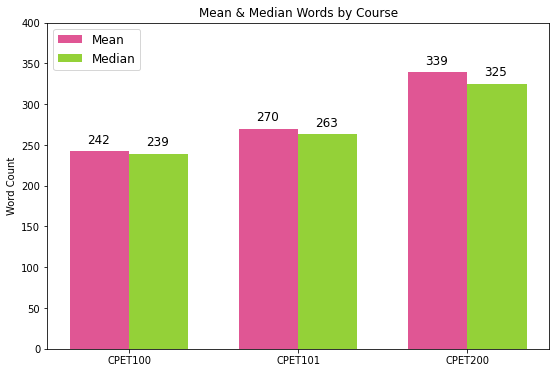

In [7]:
import matplotlib.pyplot as plt


MEANS, MEDIANS, count = ['']*3, ['']*3,  0
for course, discs in result.items():
    means, medians = [], []
    
    for disc, pair in discs.items():
        means.append(np.mean(pair[0]))
        medians.append(np.median(pair[0]))
    
    MEANS[count] = np.mean(means,dtype=int)
    MEDIANS[count] = int(np.median(medians))
    count += 1

# some of the following code comes from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

# generate chart for each measure/score/index
labels = list(result.keys())
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, MEANS, width, label='Mean', color='#d48', alpha=0.9)
rects2 = ax.bar(x + width/2, MEDIANS, width, label='Median', color='#8c2', alpha=0.9)

# add numbers above bars
for i, mean in enumerate(MEANS):
    ax.text(rects1[i].get_x()+0.1, rects1[i].get_height()+10, str(mean), color='#000', fontsize=12)
for i, med in enumerate(MEDIANS):
    ax.text(rects2[i].get_x()+0.1, rects2[i].get_height()+10, str(med), color='#000', fontsize=12)

# completing chart, making prettier
ax.set_ylabel('Word Count')
ax.set_title('Mean & Median Words by Course')
ax.set_xticks(x, labels)
ax.set_ylim(0,400)
ax.legend(loc='upper left', prop={'size':12})
    
fig.set_figwidth(9)
fig.set_figheight(6)

We are undoubtably writing more across each semester, seeing that the mean and median are increasing, but numbers themselves only provide so much insight, so let's look at some visuals. Below are distributions of all discussion post word counts, for each class/semester.

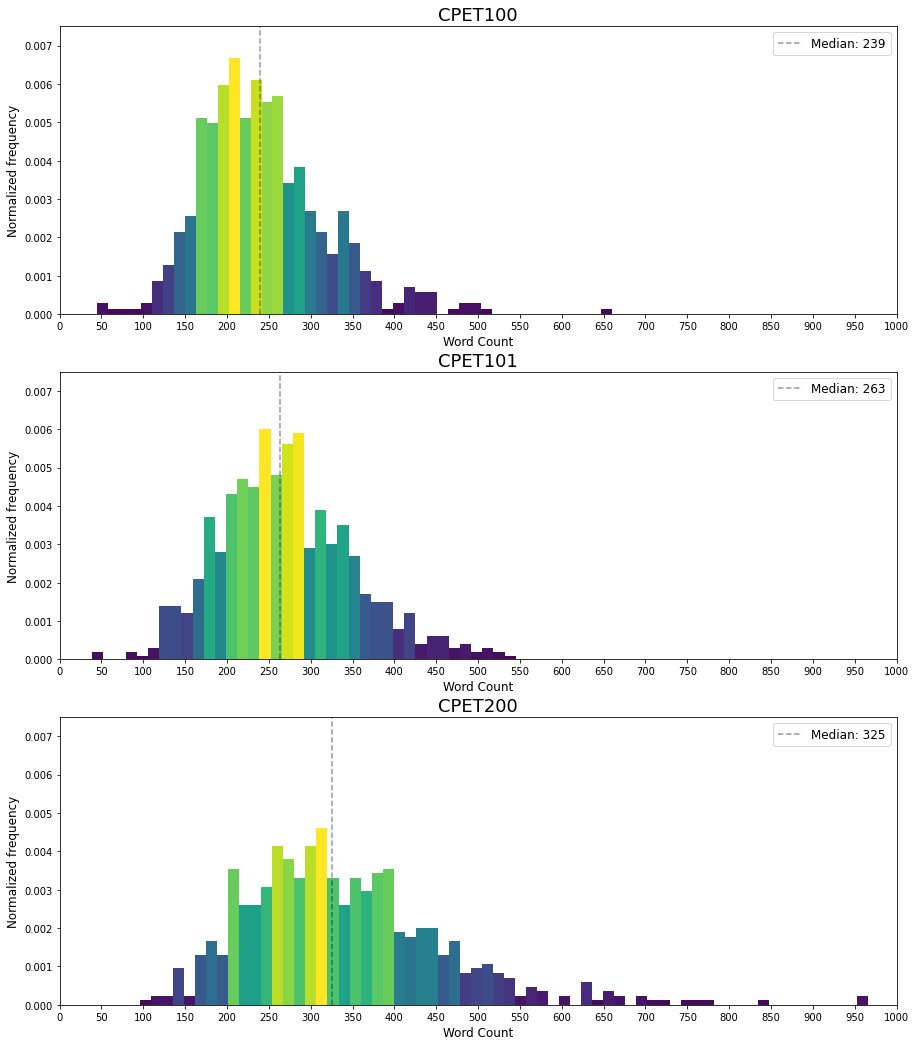

In [8]:
from matplotlib import colors

fig, axs = plt.subplots(3, 1)

for i, coursename in enumerate(result):

    course = result[coursename]
    arr = np.array([])
    
    # combining all discussions into one array
    for disc, pair in course.items():
        arr = np.append(arr, pair[0])
        
    # fancy colors, the expr for bins ensures equal bin sizes
    N, bins, patches = axs[i].hist(arr, bins=int((np.max(arr)-np.min(arr))//13), density=True)
    fracs = N / N.max()
    norm = colors.Normalize(fracs.min(), fracs.max())
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)
    
    # making a proper display
    axs[i].set_xlim(0,1000)
    axs[i].set_ylim(0,0.0075)
    axs[i].set_xlabel('Word Count', size=12)
    axs[i].set_ylabel('Normalized frequency', size=12)
    axs[i].set_title(coursename, size=18)
    axs[i].xaxis.set_ticks(np.arange(0,1050,50))
    
    # adding the median line
    axs[i].plot([MEDIANS[i], MEDIANS[i]], [0,0.0075], color='black', alpha=0.4, linestyle='dashed', label=f"Median: {MEDIANS[i]}")
    axs[i].legend(loc='upper right', prop={'size':12})

fig.set_figwidth(15)
fig.set_figheight(18)

Notice that the x and y axes are fixed, meaning we can directly compare each class' histogram to each other.  

Some things to note:
- Not many people were willing to venture over 400-450 words in CPET100 & 101, but in CPET200, posts with > 400 words suddenly now make up a large chunk of all posts.
- This also results in a lot more variance in CPET200, seems like we're less pressured to write the same amount that the group writes (note that we can see all posts for a discussion before we make ours).
- In CPET200, there seems to be a barrier in word count from 200-400 words (the green/turqoise bars) that most people don't tend to break out of. To make sure this wasn't just an anomoly caused by bin width (i.e. lying with statistics), I used at least 10 different bin sizes, and the property still holds. I should note that on Canvas discussion posts, you can see your current word count, so I'm going to make a stretch of a hypothesis that we like to just hit 200 words as an acceptable minimum, almost 400 as an acceptable maximum, and just hitting that 300 word mark is where we like to stop (in CPET100 it looks like that mark was 200 instead).  

Something fun I found while searching for resources on the topic was [a paper](http://cs229.stanford.edu/proj2018/report/185.pdf) that tried testing machine learning effectiveness on classifying and generating text of different levels of readability. The data was drawn from [WeeBit](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.716.1278&rep=rep1&type=pdf), which has 2000+ samples of text (from 7-16yo's) at 5 different levels, and they took the middle 3 and made a histogram of their word counts, and it looks almost indistinguishable from our histograms:
<div>
<img src="imgs/levels_hist.png" width="500"/>
</div>

Note the progression from levels 2 to 3 to 4, showing exactly how the writers at each level wrote more and wrote with more variance in word count, just like us in ETE over our 3 semesters instead of levels. This doesn't currently tell us too much about our progression in ETE, other than the fact that our observations in ETE are consistent with findings in the real world, and could be some sort of large pattern of human writing/development.
\[[Source](http://cs229.stanford.edu/proj2018/report/185.pdf)\]

# Analysis Part 2: Lexical Analysis
So we definitively see that students have been writing more each semester, especially in our second year (CPET200), but are students writing with more complexity? This next part will attempt to answer that question using different statistical measures.  

There is a field in machine learning called NLP (Natural Language Processing) where problems like language translation, interpreting meaning of text (semantics), and robot/AI speech are tackled, but I'll just be doing some measures that are relatively basic to see how our text complexity changes per semester.

## Lexical Readability vs. Richness
Lexical readability and lexical richness are two of the biggest general measures of text complexity that I could find (explained similarly to [this article](https://towardsdatascience.com/linguistic-complexity-measures-for-text-nlp-e4bf664bd660)).  

**Lexical readbility**:
- Includes measures like sentence length, word length, pretty rudimentary
- Tries to capture how easy or hard a text would eb to read for a random person

**Lexical richness**:
- Instead of measuring length, richness says that a more varied vocabularity = more complexity (specifically, the very simple Type/Token Ratio (TTR) = the % of unique words in a text)
- The fault here, though, is that you can only write so much before you run out of unique words, so your richness (TTR) is biased downward as you write more - so we'll see better metrics later.

First, I'll analyze **readability**:  

Being an American student, I (plus most students at my university) have an intuitive understanding of the K-12 grade level education system, so the following readability scores/measures/indices all correspond to the American grade level that one would have to be at to understand the average discussion post for a given ETE class (except for the Flesch Reading Ease score). Any grade 13+ can be understood as university-level readability.

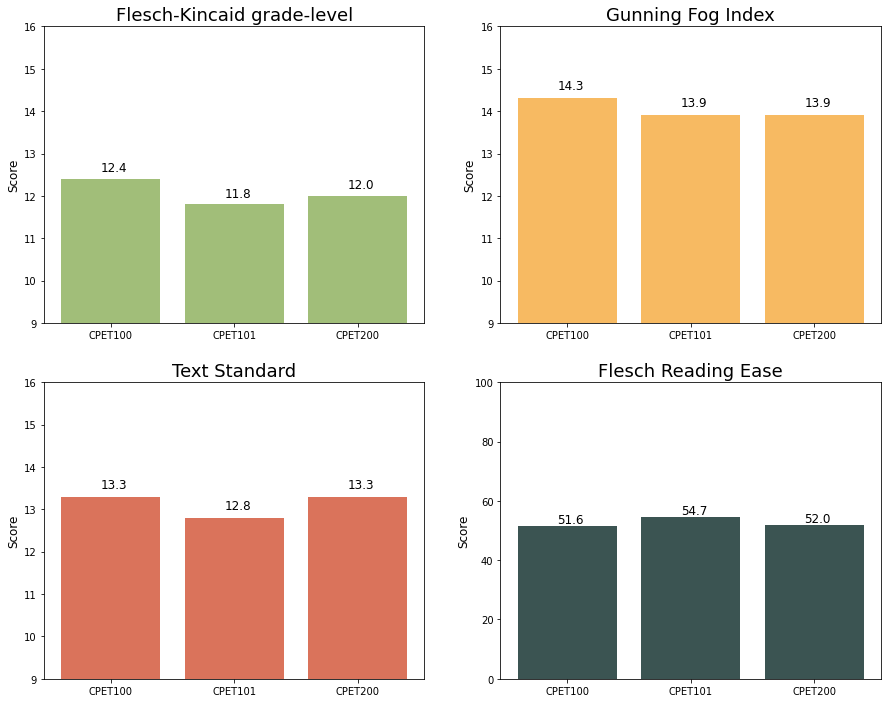

In [9]:
import textstat as ts ## package for readability, complexity, and grade level

read = [[],[],[],[]]
for course, discs in result.items():
    scores = [[],[],[],[]]
    
    for disc, pair in discs.items():
        scores[0].extend([ts.flesch_kincaid_grade(txt) for txt in pair[1]])
        scores[1].extend([ts.automated_readability_index(txt) for txt in pair[1]])
        scores[2].extend([ts.text_standard(txt, float_output=True) for txt in pair[1]])
        scores[3].extend([ts.flesch_reading_ease(txt) for txt in pair[1]])
    
    for i in range(4):
        read[i].append(round(np.mean(scores[i], dtype=float), 1))

# starting visualization, 2x2 grid of 4 metrics I want to test
fig, axes = plt.subplots(2,2)

# details to complete charts + make prettier
measures = ["Flesch-Kincaid grade-level", "Gunning Fog Index", "Text Standard", "Flesch Reading Ease"]
colors = ['#a1be79', '#f7ba62', '#da735b', '#3b5452']
ylims = [(9,16), (9,16), (9,16), (0,100)]

# generate chart for each measure/score/index
for i, measure in enumerate(measures):
    axes[i//2][i%2].bar(list(result.keys()), np.array(read[i]), align='center', alpha=1, color=colors[i])

    # adding labels to end of bars to display value
    for j, v in enumerate(read[i]):
        rects = axes[i//2][i%2].patches
        axes[i//2][i%2].text(rects[j].get_x()+0.32, rects[j].get_height()*1.015, str(v), color='#000', fontsize=12)
    
    # extraneous details to complete charts
    axes[i//2][i%2].set_title(measure, size=18)
    axes[i//2][i%2].set_ylabel("Score", size=12) 
    axes[i//2][i%2].set_ylim(ylims[i])    
    
    
fig.set_figwidth(15)
fig.set_figheight(12)

So it looks like 101 was the most readable, 100 was the least, and 200 is somewhere in the middle. They don't vary by an entire grade level or anything, but it's a bit surprising how our first semester was our 'least readable' semster. You can also interpret it as us learning to write more succicently as time went on.

These are the essentially measures that I thought were most notable. [Both Flesch scores](https://en.wikipedia.org/wiki/Flesch–Kincaid_readability_tests) only take into account total sentences, words, and syllables. The Flesch Reading Ease is rated on a chart, and our scores in the 50's are considered "fairly difficult to read", corresponding to 10-12th grade readability. The [Gunning fog index](https://en.wikipedia.org/wiki/Gunning_fog_index) is a bit more nuanced in that it takes into account "complex" words, i.e. words with 3 or more syllables. The Text Standard uses at least 7 different tests (including the ones above) to come up with a grade level, which also follows the trend. All of these tests have their own faults, since they generally equate longer words and sentences to higher complexity, whereas of course there are short words that are only easy to read for a small portion of people, like scientists or mathematicians.   

The general consensus (the Text Standard) seems to be that we consistently write at the readbility level for a university freshman to understand us, which makes sense since we wrote most of these as university freshman. I could run an ANOVA to see if the means differ with any statistical significance, but it seems pretty clear that our readability isn't becoming any more 'hard' or 'complex' for anyone at the 12th-13th grade reading level.

## Lexical Richness
Now we'll take a look at the richness (aka diversity; how broad, varied, balanced a writer's vocabulary is) for each semester. Recall the **Type/Token Ratio (TTR)**, which is just the % of unique words in a text. We know that as our text length increases, we start running out of unique words, and so our TTR is bound to go down. This bias encourages the development of better measures that try to mitigate that bias, such as vocd-D or corrected TTR, as well ones that eliminate the bias all together, like MTLD. Below are the results for those 4 measures:

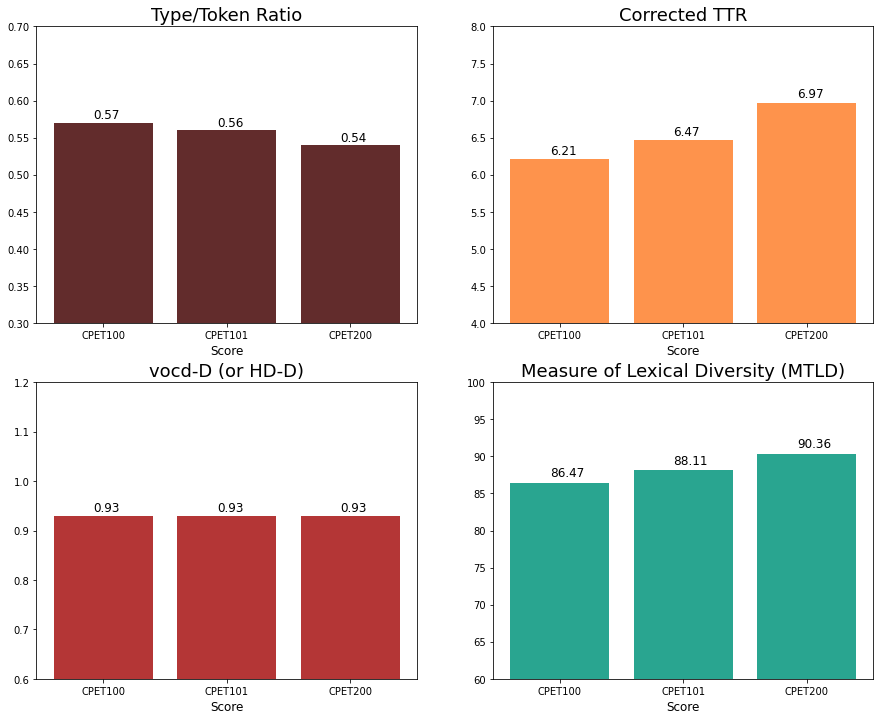

In [10]:
from lexicalrichness import LexicalRichness


rich = [[],[],[],[]]
# iter through each class to run all 4 tests
for i, (course, discs) in enumerate(result.items()):
    scores = [[],[],[],[]] 
    
    # iterate through each discussion for selected course
    for disc, pair in discs.items():
        for txt in pair[1]:
            if len(txt.split(' ')) < 100: # only want to consider submissions with at least 100 words
                continue
            lex = LexicalRichness(txt)

            # run each test on 1 post
#             for i, score in enumerate([lex.ttr, lex.mattr(window_size=100), lex.cttr, lex.mtld(threshold=0.72)]):
            for i, score in enumerate([lex.ttr, lex.cttr, lex.hdd(draws=15), lex.mtld(threshold=0.72)]):
                scores[i].append(score)

    # append course's 4 scores to richness array 
    for i in range(4):
        rich[i].append(round(np.mean(scores[i], dtype=float), 2))

        
# starting visualization, 2x2 grid of 4 metrics I want to test
fig, axes = plt.subplots(2,2)

# details to complete charts + make prettier
measures = ["Type/Token Ratio", "Corrected TTR", "vocd-D (or HD-D)", "Measure of Lexical Diversity (MTLD)"]
colors = ['#511515', '#fe8738', '#ac2020', '#119b84']
ylims = [(0.3,0.7), (4,8), (0.6,1.2), (60,100)]

# generate chart for each measure/score/index
for i, measure in enumerate(measures):
    axes[i//2][i%2].bar(list(result.keys()), np.array(rich[i]), align='center', alpha=0.9, color=colors[i])

    # adding labels to end of bars to display value
    for j, v in enumerate(rich[i]):
        rects = axes[i//2][i%2].patches
        axes[i//2][i%2].text(rects[j].get_x()+0.32, rects[j].get_height()*1.01, str(v), color='#000', fontsize=12)
    
    # extraneous details to complete charts
    axes[i//2][i%2].set_title(measure, size=18)
    axes[i//2][i%2].set_xlabel("Score", size=12) 
    axes[i//2][i%2].set_ylim(ylims[i])    
    
    
fig.set_figwidth(15)
fig.set_figheight(12)

We can see the raw TTR goes down every semester, meaning the frequency of unique words went down. But, we know this is biased towards shorter texts since you have more unique words at your disposal. vocd-D (aka HD-D) is a newer measure of lexical diversity/richness whose creators encourage its use alongside MTLD, but it's also susceptible to text length, so it's plateau doesn't tell us much. In reality, the Corrected TTR (divides TTR by a term including the text length, so creates somewhat of a 'standard unit' of TTR) shows our lexical richness actually went up, and is affirmed by that with a consistently increasing & (in my opinion) much better metric of lexical richness, the [MTLD](https://link.springer.com/content/pdf/10.3758/BRM.42.2.381.pdf) (complex to explain, but in short: it isn't effected by text length, which is good for us). 

# Conclusion
Main takeaways:
- We're writing (on avg.) 20% more each semester. Mean words jumped by 100 from ~240 to ~340 across 3 semesters. Median words jumped by ~80 in the same span, about a 36% increase.
- Lexical richness is increasing according to MTLD (one of the best metrics, isn't effected by text length).
- Lexical readability is roughly at a plateau by all relevant measures (not necessarily a bad thing in my opinion).
- (In my opinion) it seems like we're writing with a broader vocabulary each semester, but not making our sentences overly complex, rather we're keeping them accessible to the average reader at our reading level (which in my opinion is the a good possible scenario).

Looking forward:
- Can investigate discussion-by-discussion trends to see how length + complexity changes through each semester - there might be slumps in semesters depending on breaks or midterms.
- The length + number of questions in a prompt might affect post length by giving us more or less things to write about, can see how those 2 variables correlate.